In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# pd.read_parquet("/opt/anaconda3/envs/ride_duration_pred_model_MLOPS/ride_duration_prediction/dataset/green_tripdata_2021-01.parquet")
df = pd.read_parquet("/opt/anaconda3/envs/ride_duration_pred_model_MLOPS/ride_duration_prediction/dataset/green_tripdata_2021-01_cleaned.parquet")
df

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,0.50,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,0.50,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,0.50,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,0.50,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,0.00,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,2.75,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,0.00,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,2.75,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,2.75,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN


In [65]:
df.dtypes

vendorid                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
ratecodeid                      float64
pulocationid                      int64
dolocationid                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [66]:
# dispatch trip type which is represented by 2 || 1 is represented in Street-hail
df_dispatch = df[df.trip_type == 2]
df_dispatch

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,0.0,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0
15,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.00,10.0,0.0,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,0.0,0.0,0.00,0.0,None,0.3,13.30,2.0,2.0,0.0
43,2,2021-01-01 23:12:41,2021-01-02 01:13:53,N,5.0,95,82,1.0,0.00,9.7,0.0,0.0,2.00,0.0,None,0.3,12.00,1.0,2.0,0.0
45,2,2021-01-01 01:49:29,2021-01-01 01:49:33,N,5.0,244,244,5.0,0.02,12.0,0.0,0.0,2.46,0.0,None,0.3,14.76,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,0.0,0.0,0.00,0.0,None,0.3,10.30,2.0,2.0,0.0
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,0.0,0.0,0.00,0.0,None,0.3,30.30,2.0,2.0,0.0
40377,2,2021-01-31 20:09:41,2021-01-31 20:10:21,N,5.0,95,95,1.0,0.00,15.0,0.0,0.0,3.06,0.0,None,0.3,18.36,1.0,2.0,0.0
40394,2,2021-01-31 20:38:42,2021-01-31 20:38:45,N,5.0,75,264,1.0,0.00,5.0,0.0,0.0,0.20,0.0,None,0.3,5.50,1.0,2.0,0.0


In [67]:
# to predict the duration of the trip, we need to subract the pickup from the dropoff time for dispatch trips
df_dispatch_trip_duration = df_dispatch["lpep_dropoff_datetime"] - df_dispatch["lpep_pickup_datetime"]
df_dispatch_trip_duration


6       0 days 00:00:07
15      0 days 00:00:02
30      0 days 00:19:46
43      0 days 02:01:12
45      0 days 00:00:04
              ...      
40363   0 days 00:09:27
40364   0 days 00:35:02
40377   0 days 00:00:40
40394   0 days 00:00:03
40430   0 days 00:23:09
Length: 1238, dtype: timedelta64[us]

In [68]:
# convert to dropoff and pickup to datetime
# dropoff_to_datetime = pd.to_datetime(df_dispatch["lpep_dropoff_datetime"])
# pickup_to_datetime = pd.to_datetime(df_dispatch["lpep_pickup_datetime"])
# dropoff_to_datetime

In [69]:
# pickup_to_datetime

In [70]:
# subtract the new datetime conversion
# converted_df_dispatch_trip_duration = dropoff_to_datetime - pickup_to_datetime
# converted_df_dispatch_trip_duration

Conversion is not necessary because it didn't throw an error

In [71]:
# create a column for the trip duration - our new dataset will now be called df_dispatch
df_dispatch["dispatch_trip_duration"] = df_dispatch_trip_duration
df_dispatch

/var/folders/yl/5fnncqw17l7f7wmz9t_htbgr0000gn/T/ipykernel_54862/2598721929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dispatch["dispatch_trip_duration"] = df_dispatch_trip_duration


,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,dispatch_trip_duration
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,...,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0,0 days 00:00:07
15,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.00,10.0,...,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0,0 days 00:00:02
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.00,0.0,None,0.3,13.30,2.0,2.0,0.0,0 days 00:19:46
43,2,2021-01-01 23:12:41,2021-01-02 01:13:53,N,5.0,95,82,1.0,0.00,9.7,...,0.0,2.00,0.0,None,0.3,12.00,1.0,2.0,0.0,0 days 02:01:12
45,2,2021-01-01 01:49:29,2021-01-01 01:49:33,N,5.0,244,244,5.0,0.02,12.0,...,0.0,2.46,0.0,None,0.3,14.76,1.0,2.0,0.0,0 days 00:00:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,...,0.0,0.00,0.0,None,0.3,10.30,2.0,2.0,0.0,0 days 00:09:27
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,...,0.0,0.00,0.0,None,0.3,30.30,2.0,2.0,0.0,0 days 00:35:02
40377,2,2021-01-31 20:09:41,2021-01-31 20:10:21,N,5.0,95,95,1.0,0.00,15.0,...,0.0,3.06,0.0,None,0.3,18.36,1.0,2.0,0.0,0 days 00:00:40
40394,2,2021-01-31 20:38:42,2021-01-31 20:38:45,N,5.0,75,264,1.0,0.00,5.0,...,0.0,0.20,0.0,None,0.3,5.50,1.0,2.0,0.0,0 days 00:00:03


In [79]:
# the current dispatch_trip_duration column is in a format that is not easy to provide to the model
# we need to convert the dispatch_trip_duration column to mins
# method 1
# df_dispatch["dispatch_trip_duration"] = df_dispatch["dispatch_trip_duration"] / 60
# df_dispatch

In [80]:
# method 2
df_dispatch["dispatch_trip_duration"] = df_dispatch_trip_duration
df_dispatch.dispatch_trip_duration = df_dispatch.dispatch_trip_duration.apply(lambda td: td.total_seconds() / 60)
df_dispatch

/var/folders/yl/5fnncqw17l7f7wmz9t_htbgr0000gn/T/ipykernel_54862/4184806820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dispatch["dispatch_trip_duration"] = df_dispatch_trip_duration
/var/folders/yl/5fnncqw17l7f7wmz9t_htbgr0000gn/T/ipykernel_54862/4184806820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dispatch.dispatch_trip_duration = df_dispatch.dispatch_trip_duration.apply(lambda td: td.total_seconds() / 60)


,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,dispatch_trip_duration
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,...,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0,0.116667
15,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.00,10.0,...,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0,0.033333
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.00,0.0,None,0.3,13.30,2.0,2.0,0.0,19.766667
43,2,2021-01-01 23:12:41,2021-01-02 01:13:53,N,5.0,95,82,1.0,0.00,9.7,...,0.0,2.00,0.0,None,0.3,12.00,1.0,2.0,0.0,121.200000
45,2,2021-01-01 01:49:29,2021-01-01 01:49:33,N,5.0,244,244,5.0,0.02,12.0,...,0.0,2.46,0.0,None,0.3,14.76,1.0,2.0,0.0,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,...,0.0,0.00,0.0,None,0.3,10.30,2.0,2.0,0.0,9.450000
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,...,0.0,0.00,0.0,None,0.3,30.30,2.0,2.0,0.0,35.033333
40377,2,2021-01-31 20:09:41,2021-01-31 20:10:21,N,5.0,95,95,1.0,0.00,15.0,...,0.0,3.06,0.0,None,0.3,18.36,1.0,2.0,0.0,0.666667
40394,2,2021-01-31 20:38:42,2021-01-31 20:38:45,N,5.0,75,264,1.0,0.00,5.0,...,0.0,0.20,0.0,None,0.3,5.50,1.0,2.0,0.0,0.050000


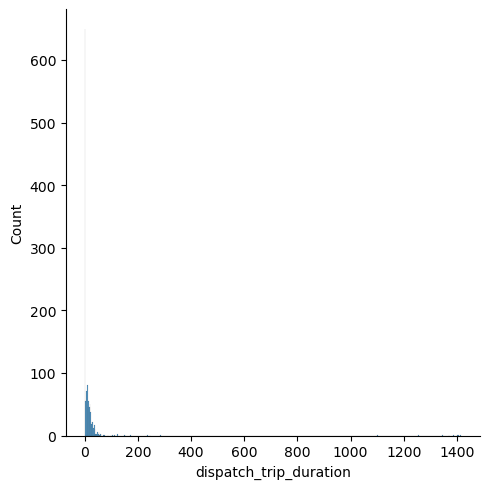

In [81]:
sns.displot(df_dispatch.dispatch_trip_duration)

We noticed that it has a long tail and it is hard to understand what is going on. Let's describe to see some new things

In [92]:
# df_dispatch.dispatch_trip_duration.describe()
df_dispatch.dispatch_trip_duration.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
dispatch_trip_duration,1238.0,18.305493,108.364382,0.0,0.1,1.666667,14.216667,1416.1


We see that 
- 25% of the trip were less than a minute, 
- 50% were over a minute while 
- 75% of them lasted a little over 14mins
- min trip was 0.00
- max trip lasted more than a day

We can go ahead to check other percentile

In [91]:
# df_dispatch.dispatch_trip_duration.describe(percentiles=[.95, .98, .99])
df_dispatch.dispatch_trip_duration.describe(percentiles=[.95, .98, .99]).to_frame().T

,count,mean,std,min,50%,95%,98%,99%,max
dispatch_trip_duration,1238.0,18.305493,108.364382,0.0,1.666667,35.604167,59.339333,149.837833,1416.1


We see that 
- 95% of the trip lasted for a little over 35mins, 
- 98% lasted a little over 59mins
- 99% of them lasted for a little over 2hrs and 29.83mins

This provides something to predict with. We can filter for data that is >= 1min and <= 60mins since about 98% of the trips were a little over 59mins.

In [ ]:
((df_dispatch.dispatch_trip_duration >= 1) & (df_dispatch.dispatch_trip_duration <= 60)).mean()

0.5169628432956381

In [89]:
df_dispatch.dispatch_trip_duration.describe(percentiles=[.25, .5]).to_frame().T

,count,mean,std,min,25%,50%,max
dispatch_trip_duration,1238.0,18.305493,108.364382,0.0,0.1,1.666667,1416.1


In [93]:
df_dispatch.isnull().sum()

vendorid                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
ratecodeid                   0
pulocationid                 0
dolocationid                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                 1238
improvement_surcharge        0
total_amount                 0
payment_type                 0
trip_type                    0
congestion_surcharge         0
dispatch_trip_duration       0
dtype: int64